<a href="https://colab.research.google.com/github/kingachvic/100DaysOfMLChallenge/blob/main/feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Do the necessary imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# we create a dummy dataset for the purpose of the lesson

In [20]:
f1_drivers = {
    'name': ['Fernando Alonso', 'Lewis Hamilton', 'Lance Stroll', 'Carlos Sainz','Max Verstappen','Charles Leclerc', 'Daniel Ricciardo', 'Nico Hulkenberg', 'Sergio Perez', 'Valteri Bottas'],
    'nationality': ['Spanish', 'English', 'Canadian', 'Spanish', 'Netherlands', 'Monaco', 'Australia', 'German', 'Mexico', 'Finland'],
    'teams': ['Aston Martin', 'Mercedes', 'Aston Martin', 'Ferrari', 'Red Bull Racing', 'Ferrari', 'RB', 'Haas', 'Redbull Racing', 'Kick Sauber'],
    'wins': [3, 7, 0, 0, 3, 0, 1, 0, 0, 0],
    '2018':[50, 408, 6, 53, 249, 39, 170, 69, 62, 247],
    '2019':[np.nan, 413, 21, 96, 278, 264, 54,37 , 52, 326],
    '2020':[np.nan, 347, 75, 105, 214, 98, 119, 10, 125, 223],
    '2021':[81, 387.5, 34, 164.5, 395.5, 159, 115, np.nan, 190, 226],
    '2022':[81, 240, 18, 246, 454, 308, 37, 0, 305, 49],
    '2023':[206, 234, 74, 200, 575, 206, 6, 9, 285, 10],
    'height':[1.71, 1.74, 1.84, 1.77, 1.81, 1.80, 1.79, 1.84, 1.73, 1.73],
    'age':[42, 39, 25, 29, 26, 26, 34, 36,34, 34],
    'salary ($ million)':[18, 45, 3, 12, 55, 34, 7, 2, 14, 10]

}
df = pd.DataFrame(f1_drivers)
df

,name,nationality,teams,wins,2018,2019,2020,2021,2022,2023,height,age,salary ($ million)
0,Fernando Alonso,Spanish,Aston Martin,3,50,NaN,NaN,81.0,81,206,1.71,42,18
1,Lewis Hamilton,English,Mercedes,7,408,413.0,347.0,387.5,240,234,1.74,39,45
2,Lance Stroll,Canadian,Aston Martin,0,6,21.0,75.0,34.0,18,74,1.84,25,3
3,Carlos Sainz,Spanish,Ferrari,0,53,96.0,105.0,164.5,246,200,1.77,29,12
4,Max Verstappen,Netherlands,Red Bull Racing,3,249,278.0,214.0,395.5,454,575,1.81,26,55
5,Charles Leclerc,Monaco,Ferrari,0,39,264.0,98.0,159.0,308,206,1.80,26,34
6,Daniel Ricciardo,Australia,RB,1,170,54.0,119.0,115.0,37,6,1.79,34,7
7,Nico Hulkenberg,German,Haas,0,69,37.0,10.0,NaN,0,9,1.84,36,2
8,Sergio Perez,Mexico,Redbull Racing,0,62,52.0,125.0,190.0,305,285,1.73,34,14
9,Valteri Bottas,Finland,Kick Sauber,0,247,326.0,223.0,226.0,49,10,1.73,34,10


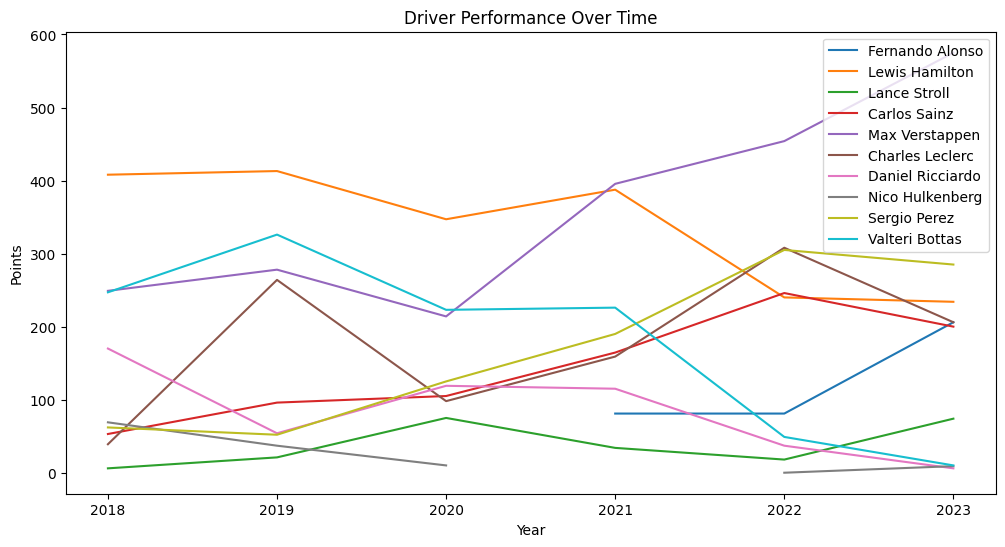

In [21]:
# @title Driver Performance Over Time

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(12, 6))
for driver in df['name']:
    plt.plot([2018, 2019, 2020, 2021, 2022, 2023],
             [df[df['name'] == driver]['2018'].values[0],
              df[df['name'] == driver]['2019'].values[0],
              df[df['name'] == driver]['2020'].values[0],
              df[df['name'] == driver]['2021'].values[0],
              df[df['name'] == driver]['2022'].values[0],
              df[df['name'] == driver]['2023'].values[0]], label=driver)
plt.xlabel('Year')
plt.ylabel('Points')
plt.title('Driver Performance Over Time')
_ = plt.legend()

## let's visualise the distribution of the data

<ipython-input-32-ceb49744e2e3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


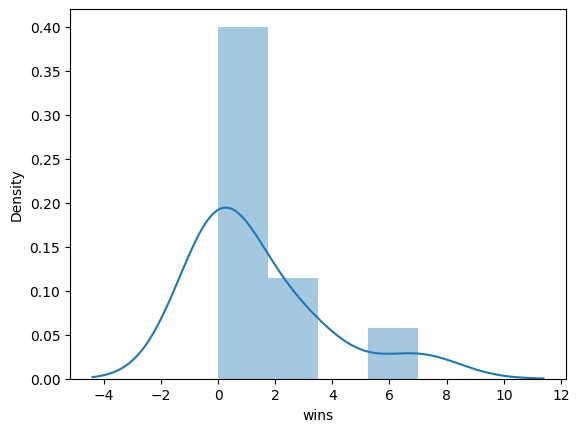

<ipython-input-32-ceb49744e2e3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


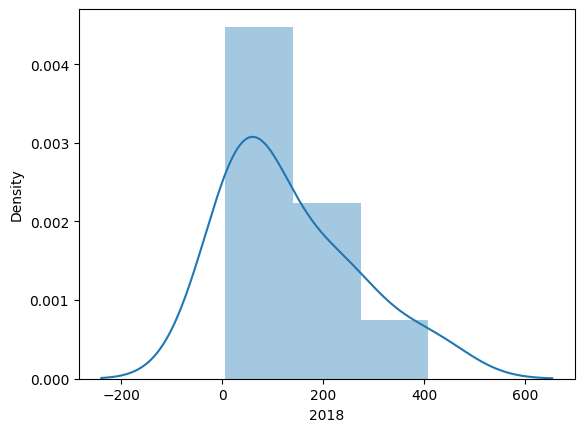

<ipython-input-32-ceb49744e2e3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


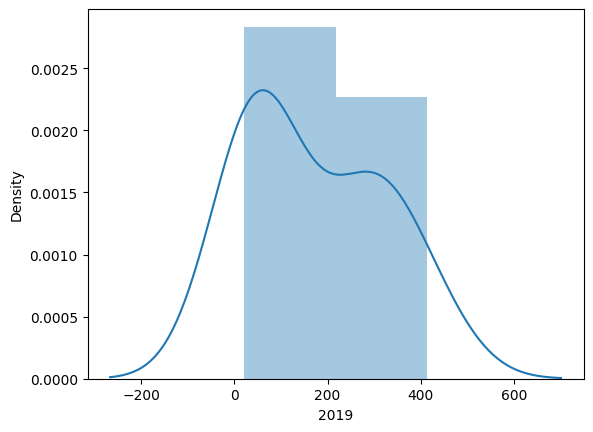

<ipython-input-32-ceb49744e2e3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


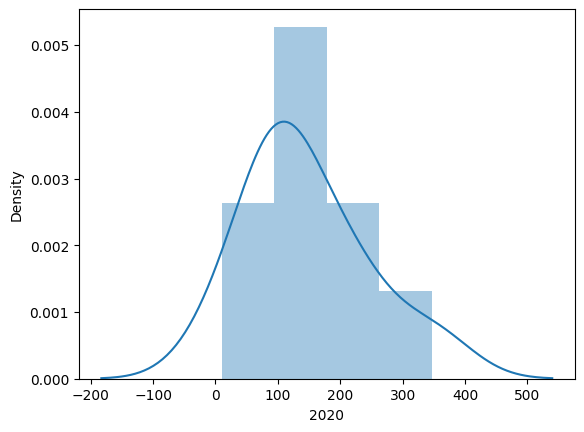

<ipython-input-32-ceb49744e2e3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


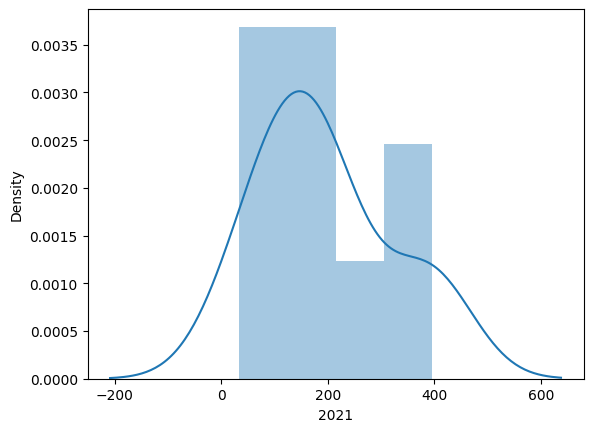

<ipython-input-32-ceb49744e2e3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


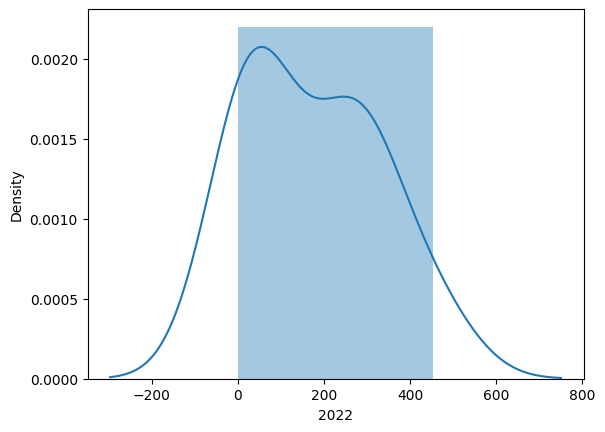

<ipython-input-32-ceb49744e2e3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


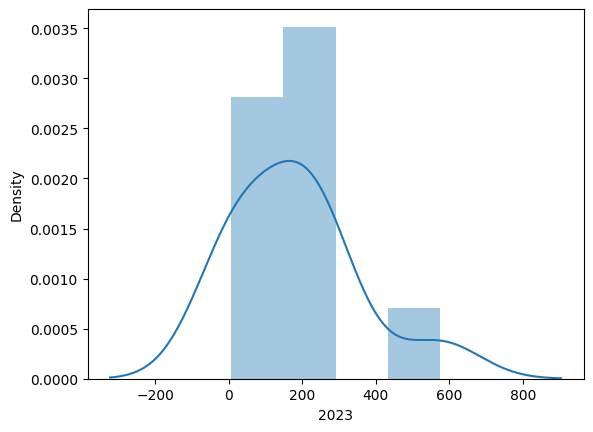

<ipython-input-32-ceb49744e2e3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


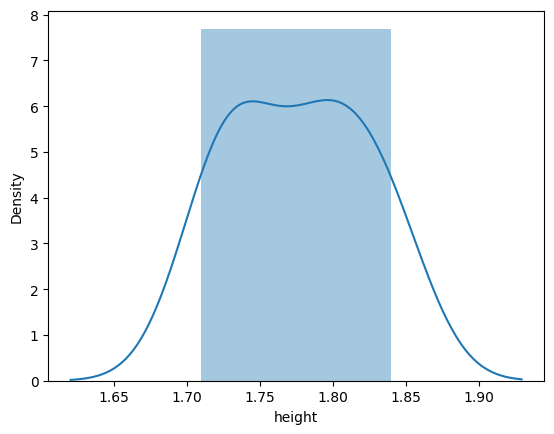

<ipython-input-32-ceb49744e2e3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


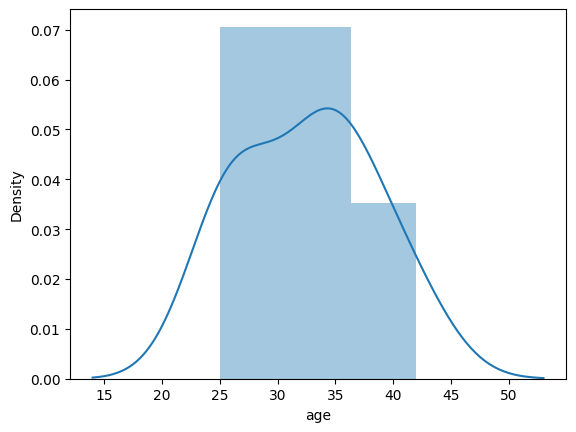

<ipython-input-32-ceb49744e2e3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


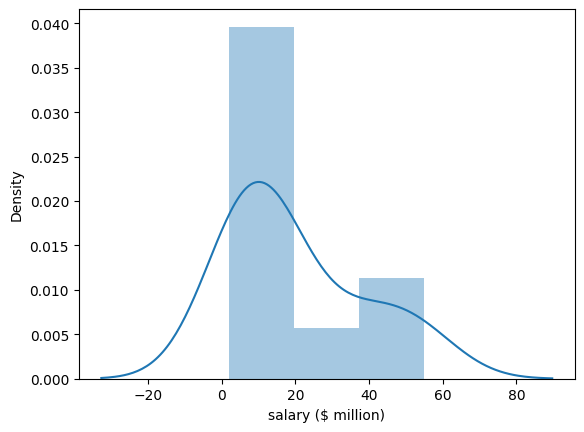

In [32]:

# Create a density plot for each numerical column
for col in df.select_dtypes(include=['number']):
    sns.distplot(df[col])
    plt.show()


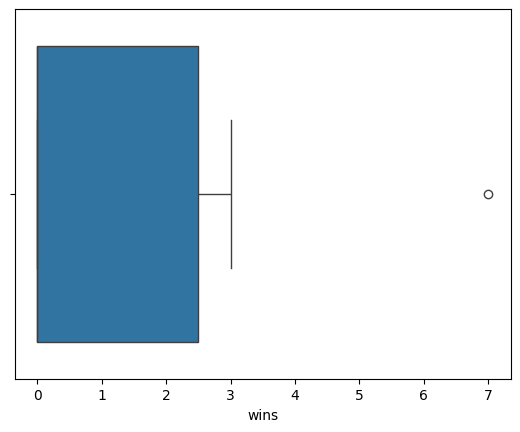

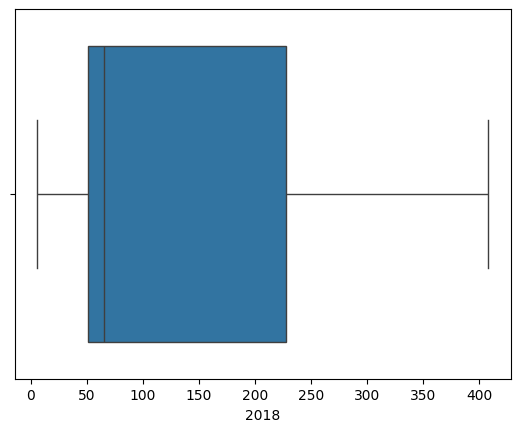

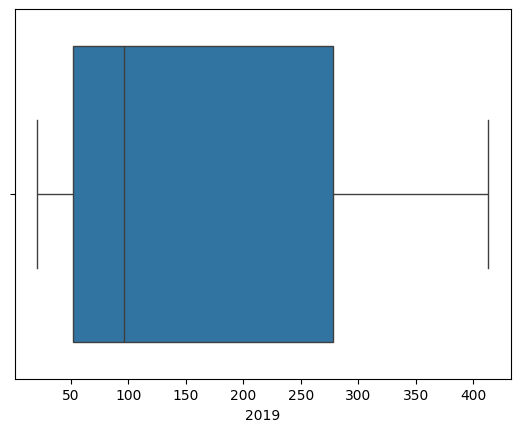

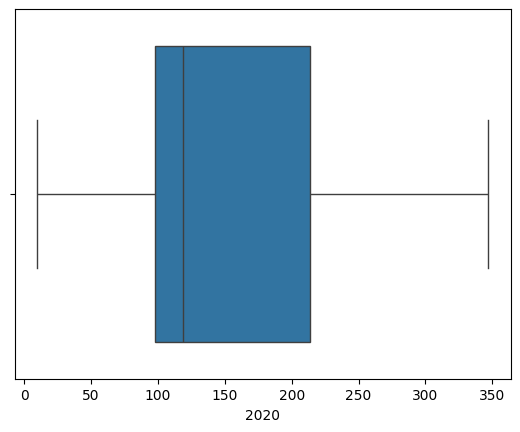

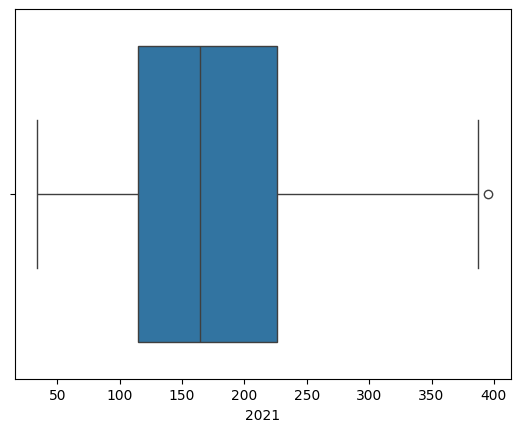

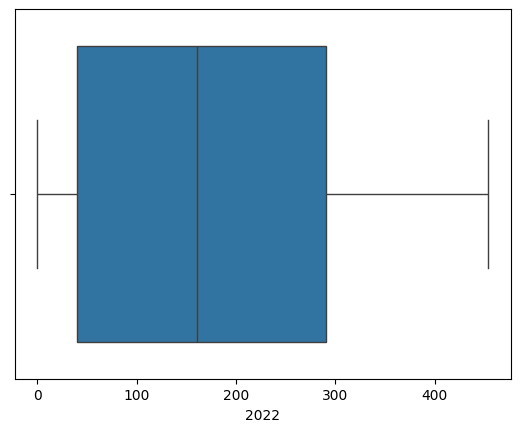

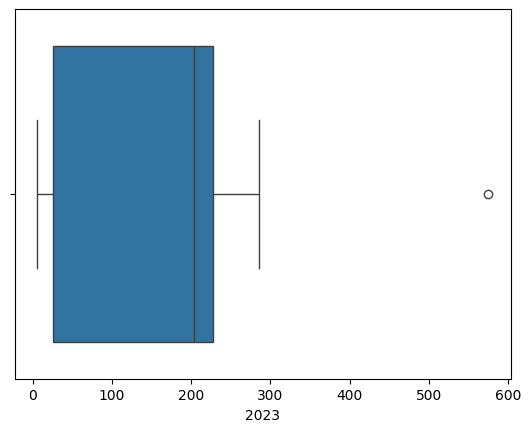

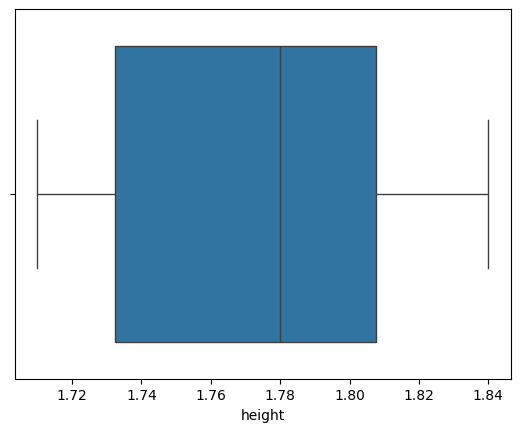

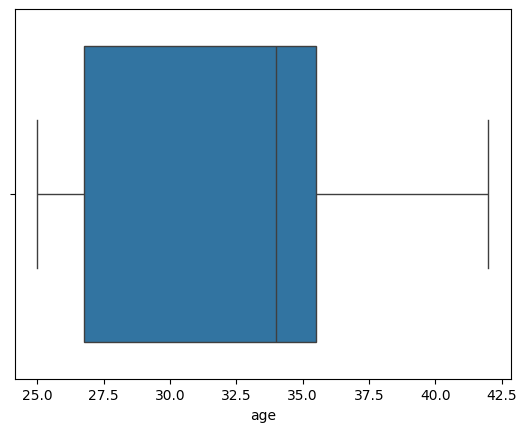

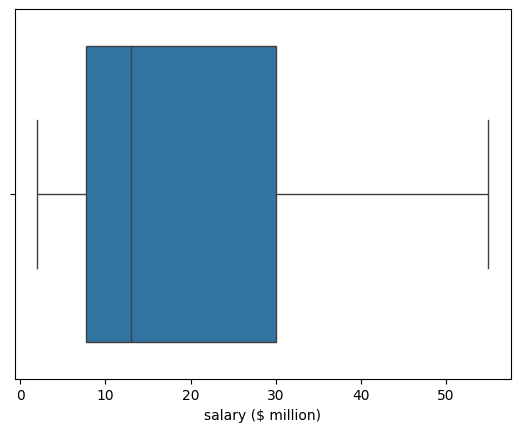

In [39]:

# Create boxplots for each numerical column
for col in df.select_dtypes(include=['number']):
    sns.boxplot(x=df[col])
    plt.show()


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                10 non-null     object 
 1   nationality         10 non-null     object 
 2   teams               10 non-null     object 
 3   wins                10 non-null     int64  
 4   2018                10 non-null     int64  
 5   2019                9 non-null      float64
 6   2020                9 non-null      float64
 7   2021                9 non-null      float64
 8   2022                10 non-null     int64  
 9   2023                10 non-null     int64  
 10  height              10 non-null     float64
 11  age                 10 non-null     int64  
 12  salary ($ million)  10 non-null     int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 1.1+ KB


In [23]:
df.describe()

,wins,2018,2019,2020,2021,2022,2023,height,age,salary ($ million)
count,10.000000,10.000000,9.000000,9.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.400000,135.300000,171.222222,146.222222,194.722222,173.800000,180.500000,1.776000,32.500000,20.000000
std,2.319004,129.436428,148.583964,99.778226,125.391913,156.599844,173.643473,0.047188,5.816643,18.354533
min,0.000000,6.000000,21.000000,10.000000,34.000000,0.000000,6.000000,1.710000,25.000000,2.000000
25%,0.000000,50.750000,52.000000,98.000000,115.000000,40.000000,26.000000,1.732500,26.750000,7.750000
50%,0.000000,65.500000,96.000000,119.000000,164.500000,160.500000,203.000000,1.780000,34.000000,13.000000
75%,2.500000,227.750000,278.000000,214.000000,226.000000,290.250000,227.000000,1.807500,35.500000,30.000000
max,7.000000,408.000000,413.000000,347.000000,395.500000,454.000000,575.000000,1.840000,42.000000,55.000000


In [24]:
df_clean = df.fillna(0)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                10 non-null     object 
 1   nationality         10 non-null     object 
 2   teams               10 non-null     object 
 3   wins                10 non-null     int64  
 4   2018                10 non-null     int64  
 5   2019                10 non-null     float64
 6   2020                10 non-null     float64
 7   2021                10 non-null     float64
 8   2022                10 non-null     int64  
 9   2023                10 non-null     int64  
 10  height              10 non-null     float64
 11  age                 10 non-null     int64  
 12  salary ($ million)  10 non-null     int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 1.1+ KB


# drop the non-numerical values and the values that don't need scaling

In [25]:
df_clean = df_clean.drop(['nationality', 'teams', 'name'], axis=1)
df_clean


,wins,2018,2019,2020,2021,2022,2023,height,age,salary ($ million)
0,3,50,0.0,0.0,81.0,81,206,1.71,42,18
1,7,408,413.0,347.0,387.5,240,234,1.74,39,45
2,0,6,21.0,75.0,34.0,18,74,1.84,25,3
3,0,53,96.0,105.0,164.5,246,200,1.77,29,12
4,3,249,278.0,214.0,395.5,454,575,1.81,26,55
5,0,39,264.0,98.0,159.0,308,206,1.80,26,34
6,1,170,54.0,119.0,115.0,37,6,1.79,34,7
7,0,69,37.0,10.0,0.0,0,9,1.84,36,2
8,0,62,52.0,125.0,190.0,305,285,1.73,34,14
9,0,247,326.0,223.0,226.0,49,10,1.73,34,10


## lets perfom standardisation

In [26]:
std_scaler = StandardScaler()
df_std = std_scaler.fit_transform(df_clean)
df_std

array([[ 0.72727273, -0.69465834, -1.08156224, -1.32337588, -0.74532103,
        -0.62464806,  0.15479626, -1.47433127,  1.72159089, -0.1148591 ],
       [ 2.54545455,  2.22078934,  1.81710879,  2.16607268,  1.67845506,
         0.44560023,  0.32476862, -0.80418069,  1.17793061,  1.43573871],
       [-0.63636364, -1.05298152, -0.93417219, -0.5691723 , -1.11699306,
        -1.04870871, -0.64650203,  1.42965457, -1.35915071, -0.97630232],
       [-0.63636364, -0.67022722, -0.40777915, -0.26749087, -0.08501009,
         0.48598696,  0.11837361, -0.13403012, -0.63427033, -0.45943639],
       [ 0.72727273,  0.92593967,  0.86960131,  0.82861833,  1.74171838,
         1.8860602 ,  2.3947892 ,  0.75950399, -1.17793061,  2.0100342 ],
       [-0.63636364, -0.78423914,  0.77134128, -0.3378832 , -0.12850363,
         0.90331649,  0.15479626,  0.53612046, -1.17793061,  0.80401368],
       [-0.18181818,  0.28258669, -0.70255925, -0.1267062 , -0.47645191,
        -0.9208174 , -1.05929205,  0.31273694

In [34]:

df_std = pd.DataFrame(df_std, columns=df_clean.columns)
df_std


,wins,2018,2019,2020,2021,2022,2023,height,age,salary ($ million)
0,0.727273,-0.694658,-1.081562,-1.323376,-0.745321,-0.624648,0.154796,-1.474331,1.721591,-0.114859
1,2.545455,2.220789,1.817109,2.166073,1.678455,0.445600,0.324769,-0.804181,1.177931,1.435739
2,-0.636364,-1.052982,-0.934172,-0.569172,-1.116993,-1.048709,-0.646502,1.429655,-1.359151,-0.976302
3,-0.636364,-0.670227,-0.407779,-0.267491,-0.085010,0.485987,0.118374,-0.134030,-0.634270,-0.459436
4,0.727273,0.925940,0.869601,0.828618,1.741718,1.886060,2.394789,0.759504,-1.177931,2.010034
5,-0.636364,-0.784239,0.771341,-0.337883,-0.128504,0.903316,0.154796,0.536120,-1.177931,0.804014
6,-0.181818,0.282587,-0.702559,-0.126706,-0.476452,-0.920817,-1.059292,0.312737,0.271830,-0.746584
7,-0.636364,-0.539928,-0.821875,-1.222815,-1.385862,-1.169869,-1.041081,1.429655,0.634270,-1.033732
8,-0.636364,-0.596934,-0.716596,-0.066370,0.116642,0.883123,0.634361,-1.027564,0.271830,-0.344577
9,-0.636364,0.909652,1.206493,0.919123,0.401327,-0.840044,-1.035010,-1.027564,0.271830,-0.574295


In [40]:
df_std.describe()

,wins,2018,2019,2020,2021,2022,2023,height,age,salary ($ million)
count,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.000000,1.000000e+01,10.000000,1.000000e+01
mean,4.440892e-17,-1.332268e-16,2.220446e-17,4.440892e-17,-1.110223e-17,-6.661338e-17,0.000000,-4.884981e-15,0.000000,-1.110223e-17
std,1.054093e+00,1.054093e+00,1.054093e+00,1.054093e+00,1.054093e+00,1.054093e+00,1.054093,1.054093e+00,1.054093,1.054093e+00
min,-6.363636e-01,-1.052982e+00,-1.081562e+00,-1.323376e+00,-1.385862e+00,-1.169869e+00,-1.059292,-1.474331e+00,-1.359151,-1.033732e+00
25%,-6.363636e-01,-6.885506e-01,-7.955554e-01,-5.113500e-01,-6.781038e-01,-9.006240e-01,-0.937883,-9.717183e-01,-1.042016,-7.035120e-01
50%,-6.363636e-01,-5.684309e-01,-5.551692e-01,-1.970985e-01,-1.067569e-01,-8.952391e-02,0.136585,8.935341e-02,0.271830,-4.020068e-01
75%,5.000000e-01,7.528859e-01,8.450363e-01,6.048713e-01,3.301555e-01,7.838391e-01,0.282276,7.036581e-01,0.543660,5.742955e-01
max,2.545455e+00,2.220789e+00,1.817109e+00,2.166073e+00,1.741718e+00,1.886060e+00,2.394789,1.429655e+00,1.721591,2.010034e+00


# let's perfom normalisation

In [35]:
norm_scaler = MinMaxScaler()
df_norm = norm_scaler.fit_transform(df_clean)
df_norm

array([[0.42857143, 0.10945274, 0.        , 0.        , 0.20480405,
        0.1784141 , 0.35149385, 0.        , 1.        , 0.30188679],
       [1.        , 1.        , 1.        , 1.        , 0.97977244,
        0.52863436, 0.40070299, 0.23076923, 0.82352941, 0.81132075],
       [0.        , 0.        , 0.05084746, 0.21613833, 0.08596713,
        0.03964758, 0.11950791, 1.        , 0.        , 0.01886792],
       [0.        , 0.11691542, 0.23244552, 0.30259366, 0.4159292 ,
        0.54185022, 0.34094903, 0.46153846, 0.23529412, 0.18867925],
       [0.42857143, 0.60447761, 0.67312349, 0.6167147 , 1.        ,
        1.        , 1.        , 0.76923077, 0.05882353, 1.        ],
       [0.        , 0.08208955, 0.63922518, 0.28242075, 0.40202276,
        0.6784141 , 0.35149385, 0.69230769, 0.05882353, 0.60377358],
       [0.14285714, 0.4079602 , 0.13075061, 0.34293948, 0.29077118,
        0.0814978 , 0.        , 0.61538462, 0.52941176, 0.09433962],
       [0.        , 0.15671642, 0.0895883

In [36]:
df_norm = pd.DataFrame(df_norm, columns=df_clean.columns)
df_norm

,wins,2018,2019,2020,2021,2022,2023,height,age,salary ($ million)
0,0.428571,0.109453,0.000000,0.000000,0.204804,0.178414,0.351494,0.000000,1.000000,0.301887
1,1.000000,1.000000,1.000000,1.000000,0.979772,0.528634,0.400703,0.230769,0.823529,0.811321
2,0.000000,0.000000,0.050847,0.216138,0.085967,0.039648,0.119508,1.000000,0.000000,0.018868
3,0.000000,0.116915,0.232446,0.302594,0.415929,0.541850,0.340949,0.461538,0.235294,0.188679
4,0.428571,0.604478,0.673123,0.616715,1.000000,1.000000,1.000000,0.769231,0.058824,1.000000
5,0.000000,0.082090,0.639225,0.282421,0.402023,0.678414,0.351494,0.692308,0.058824,0.603774
6,0.142857,0.407960,0.130751,0.342939,0.290771,0.081498,0.000000,0.615385,0.529412,0.094340
7,0.000000,0.156716,0.089588,0.028818,0.000000,0.000000,0.005272,1.000000,0.647059,0.000000
8,0.000000,0.139303,0.125908,0.360231,0.480405,0.671806,0.490334,0.153846,0.529412,0.226415
9,0.000000,0.599502,0.789346,0.642651,0.571429,0.107930,0.007030,0.153846,0.529412,0.150943


In [41]:
df_norm.describe()

,wins,2018,2019,2020,2021,2022,2023,height,age,salary ($ million)
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.200000,0.321642,0.373123,0.379251,0.443110,0.382819,0.306678,0.507692,0.441176,0.339623
std,0.331286,0.321981,0.363647,0.302080,0.337031,0.344934,0.305173,0.362981,0.342155,0.346312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.111318,0.098668,0.232709,0.226296,0.088106,0.035149,0.173077,0.102941,0.108491
50%,0.000000,0.148010,0.181598,0.322767,0.408976,0.353524,0.346221,0.538462,0.529412,0.207547
75%,0.357143,0.551617,0.664649,0.552594,0.548673,0.639317,0.388401,0.750000,0.617647,0.528302
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Because of outliers in our data it is wise to use robust scaler

In [37]:
robust_scaler = RobustScaler()
df_robust = robust_scaler.fit_transform(df_clean)
df_robust

array([[ 1.2       , -0.08757062, -0.32085561, -1.00900901, -0.63333333,
        -0.31768232,  0.01492537, -0.93333333,  0.91428571,  0.2247191 ],
       [ 2.8       ,  1.93502825,  1.4459893 ,  2.11711712,  1.77058824,
         0.31768232,  0.15422886, -0.53333333,  0.57142857,  1.43820225],
       [ 0.        , -0.33615819, -0.23101604, -0.33333333, -1.00196078,
        -0.56943057, -0.64179104,  0.8       , -1.02857143, -0.4494382 ],
       [ 0.        , -0.07062147,  0.08983957, -0.06306306,  0.02156863,
         0.34165834, -0.01492537, -0.13333333, -0.57142857, -0.04494382],
       [ 1.2       ,  1.03672316,  0.8684492 ,  0.91891892,  1.83333333,
         1.17282717,  1.85074627,  0.4       , -0.91428571,  1.88764045],
       [ 0.        , -0.14971751,  0.80855615, -0.12612613, -0.02156863,
         0.58941059,  0.01492537,  0.26666667, -0.91428571,  0.94382022],
       [ 0.4       ,  0.59039548, -0.08983957,  0.06306306, -0.36666667,
        -0.49350649, -0.9800995 ,  0.13333333

In [38]:
df_robust = pd.DataFrame(df_robust, columns=df_clean.columns)
df_robust

,wins,2018,2019,2020,2021,2022,2023,height,age,salary ($ million)
0,1.2,-0.087571,-0.320856,-1.009009,-0.633333,-0.317682,0.014925,-0.933333,0.914286,0.224719
1,2.8,1.935028,1.445989,2.117117,1.770588,0.317682,0.154229,-0.533333,0.571429,1.438202
2,0.0,-0.336158,-0.231016,-0.333333,-1.001961,-0.569431,-0.641791,0.800000,-1.028571,-0.449438
3,0.0,-0.070621,0.089840,-0.063063,0.021569,0.341658,-0.014925,-0.133333,-0.571429,-0.044944
4,1.2,1.036723,0.868449,0.918919,1.833333,1.172827,1.850746,0.400000,-0.914286,1.887640
5,0.0,-0.149718,0.808556,-0.126126,-0.021569,0.589411,0.014925,0.266667,-0.914286,0.943820
6,0.4,0.590395,-0.089840,0.063063,-0.366667,-0.493506,-0.980100,0.133333,0.000000,-0.269663
7,0.0,0.019774,-0.162567,-0.918919,-1.268627,-0.641359,-0.965174,0.800000,0.228571,-0.494382
8,0.0,-0.019774,-0.098396,0.117117,0.221569,0.577423,0.407960,-0.666667,0.000000,0.044944
9,0.0,1.025424,1.073797,1.000000,0.503922,-0.445554,-0.960199,-0.666667,0.000000,-0.134831


In [42]:
df_robust.describe()

,wins,2018,2019,2020,2021,2022,2023,height,age,salary ($ million)
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.560000,0.394350,0.338396,0.176577,0.105882,0.053147,-0.111940,-0.053333,-0.171429,0.314607
std,0.927601,0.731279,0.642508,0.944340,1.045458,0.625774,0.863898,0.629168,0.664759,0.824923
min,0.000000,-0.336158,-0.320856,-1.009009,-1.268627,-0.641359,-0.980100,-0.933333,-1.028571,-0.494382
25%,0.000000,-0.083333,-0.146524,-0.281532,-0.566667,-0.481518,-0.880597,-0.633333,-0.828571,-0.235955
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.916667,0.853476,0.718468,0.433333,0.518482,0.119403,0.366667,0.171429,0.764045
max,2.800000,1.935028,1.445989,2.117117,1.833333,1.172827,1.850746,0.800000,0.914286,1.887640
